In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
n = np.random.randint(low=100, high = 1000, size=1)
A = np.random.rand(n[0],n[0])
np.random.seed(123)

In [64]:
print(A.shape)

(610, 610)


In [65]:
A

array([[0.71295532, 0.42847093, 0.69088486, ..., 0.3516961 , 0.76160856,
        0.65643134],
       [0.56189354, 0.59680222, 0.17424446, ..., 0.74016045, 0.02193203,
        0.6599364 ],
       [0.23159089, 0.55460458, 0.15881452, ..., 0.20742773, 0.4167936 ,
        0.86918622],
       ...,
       [0.28073851, 0.09962333, 0.62787165, ..., 0.87954882, 0.22273568,
        0.86021673],
       [0.56351333, 0.88723237, 0.56078717, ..., 0.17329414, 0.36691715,
        0.61675524],
       [0.6808563 , 0.74145038, 0.85880142, ..., 0.27812693, 0.40923504,
        0.60806369]])

In [66]:
U, s, VT = np.linalg.svd(A)

In [67]:
print(U.shape)
print(s.shape)
print(VT.shape)

(610, 610)
(610,)
(610, 610)


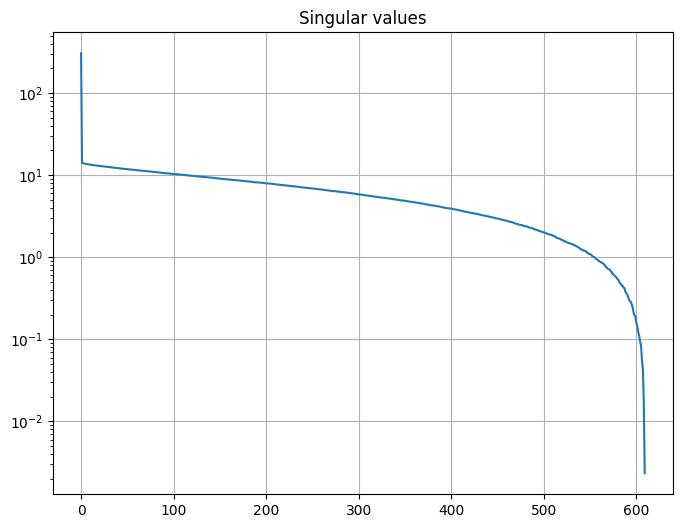

In [68]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_yscale('log')
ax.plot(s)
ax.grid(True)
ax.set_title('Singular values')
plt.show()

129.04834829254017


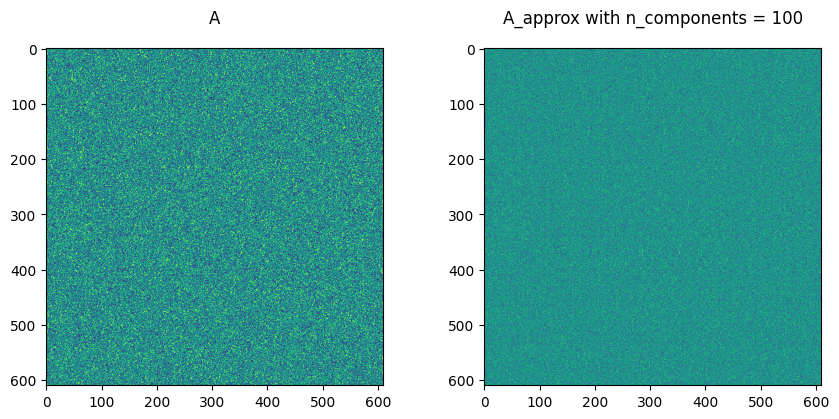

In [101]:
Sigma = np.diag(s)

r = 100
A_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(A)
ax1.set_title("A", y=1.05)

ax2.imshow(A_approx)
ax2.set_title(f'A_approx with n_components = {r}', y=1.05)

E_r = np.linalg.norm(A - A_approx)
print(E_r)
plt.show()

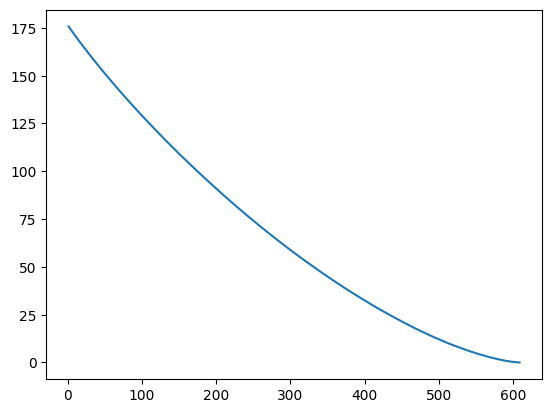

In [102]:
ranks = np.arange(1, n[-1])
errors = []
for r in ranks:
    A_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]
    error = np.linalg.norm(A - A_approx)
    errors.append(error)

plt.figure()
plt.plot(ranks, errors)